In [267]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv('WQ.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
df.shape

(1599, 12)

In [25]:
# Basic Stats
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [26]:
#checking for type of the data
df.info()
# information of df -- columns, datatypes etc., No null values present in df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

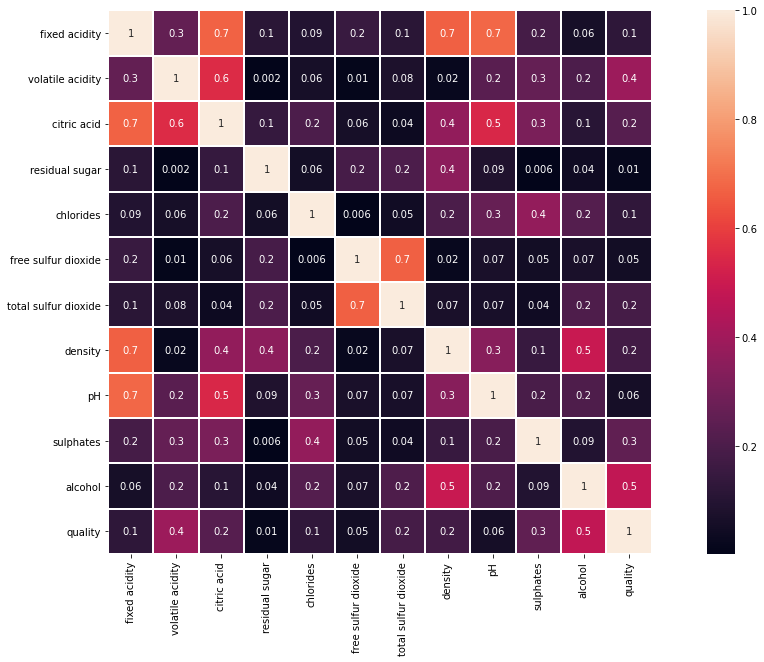

In [27]:
#plotting a fig to determine correlation between all features of dfset
df_corr=df.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True,square=True,fmt='.1g',linewidth=1)

<AxesSubplot:>

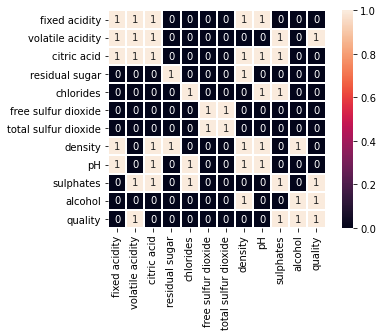

In [28]:
#All correlations greater than 0.25 -- This serves as an easier reference to the above plot.
sns.heatmap(df_corr>0.25,annot=True,square=True,fmt='.1g',linewidth=1)

- label is highly corelated with alcohol.
- label is least corelated with residual sugar.
- multi collinearity not present.

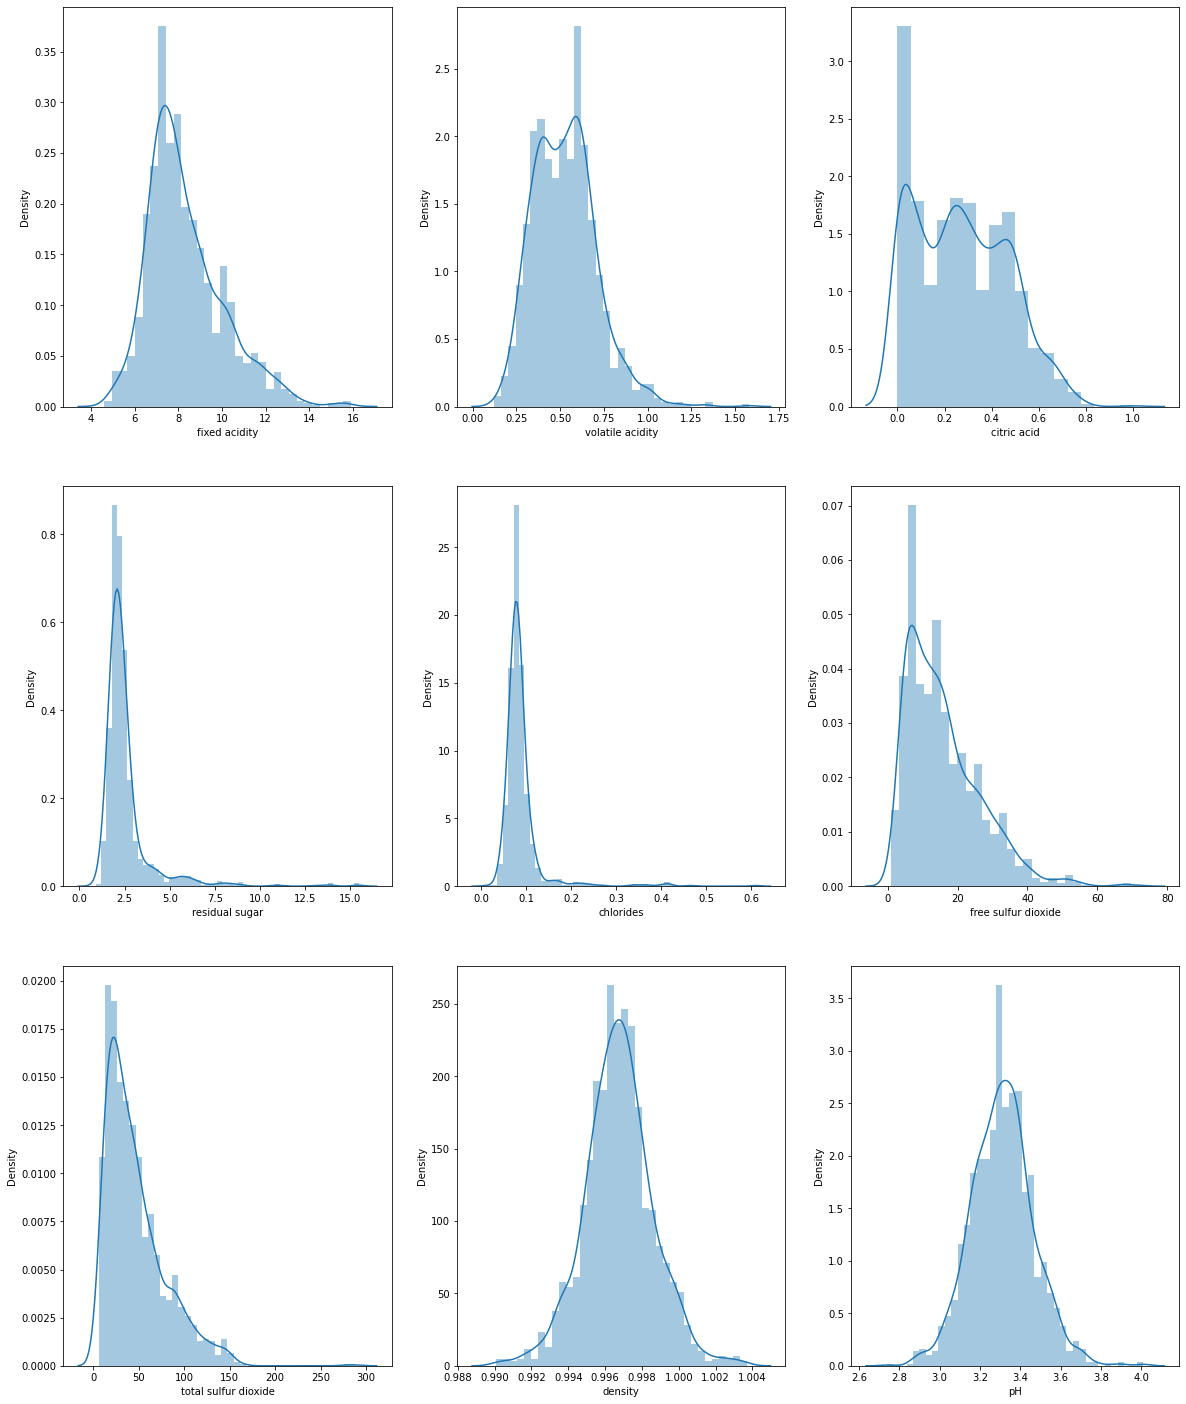

In [29]:
#Distribution of the df
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

- skew is present (speecially in residual sugar, chlorides and free sulfur dioxide) --needs to be fixed

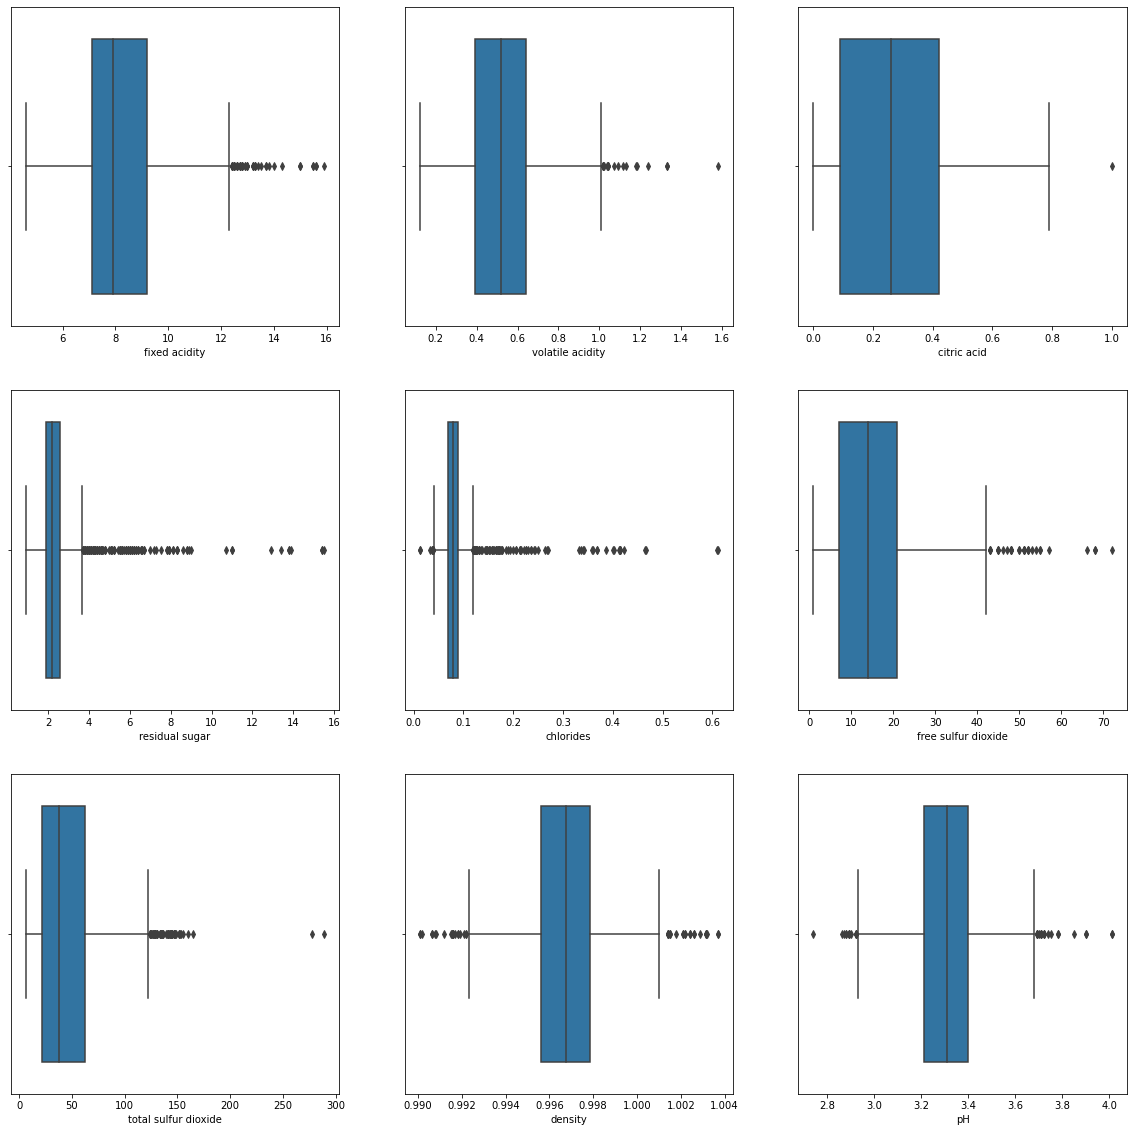

In [30]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1

In [31]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [32]:
z=np.abs(stats.zscore(df))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


In [33]:
#Rows and columns with more than 3 outliers
np.where(z>3) 

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [34]:
index=(np.where(z>3)[0])
df=df.drop(df.index[index])
df.shape

(1451, 12)

- Outliers dropped
- datashape (1599, 12)->(1451, 12) : 148 rows dropped

In [35]:
df.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

<br><br>
<b>
    <h4>Previous Values</h4>
    <li> fixed acidity          = 0.982751</li>
    <li> volatile acidity       = 0.671593</li>
    <li> citric acid            = 0.318337</li>
    <li> residual sugar         = 4.540655</li>
    <li> chlorides              = 5.680347</li>
    <li> free sulfur dioxide    = 1.250567</li>
    <li> total sulfur dioxide   = 1.515531</li>
    <li> density                = 0.071288</li>
    <li> pH                     = 0.193683</li>
    <li> sulphates              = 2.428672</li>
    <li> alcohol                = 0.860829</li>
    <li> quality                = 0.217802</li>
    <li> dtype: float64</li>

In [36]:
#features and labels
data=df.drop(columns='quality')
labels=df['quality']

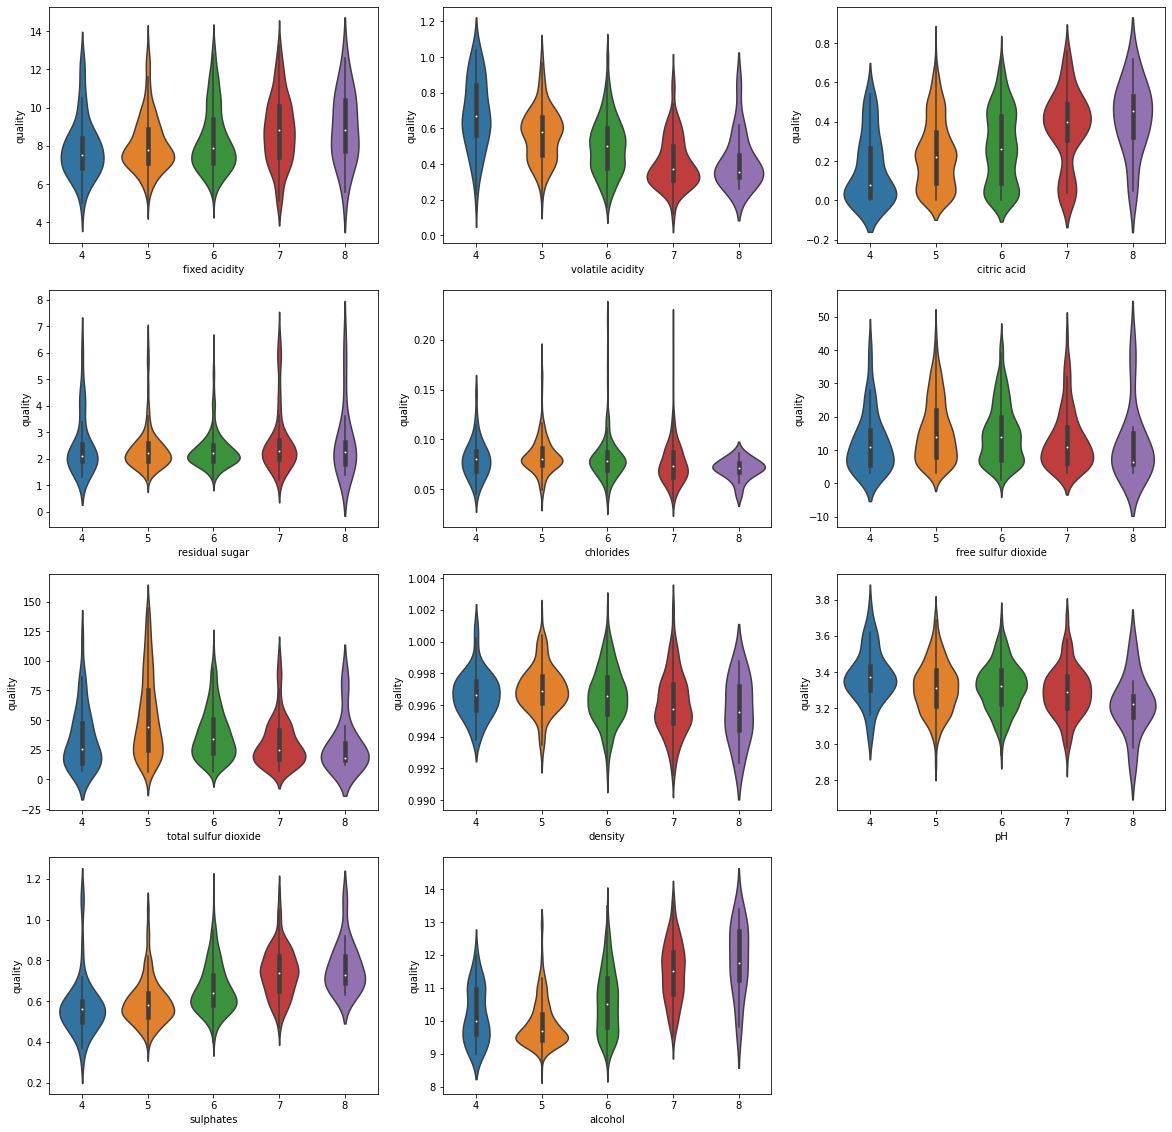

In [69]:
#Data and labels relation
plt.figure(figsize=(20,20))
plotnumber=1
for i in data:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.violinplot(labels,data[i])
        plt.xlabel(i)
        plt.ylabel('quality')
    plotnumber+=1

- Correlated elements are correlated only upto a certain degree after which the corr drops. 

In [ ]:
#Converting the probability distribution to make it more gaussian

In [79]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data = power.fit_transform(data)

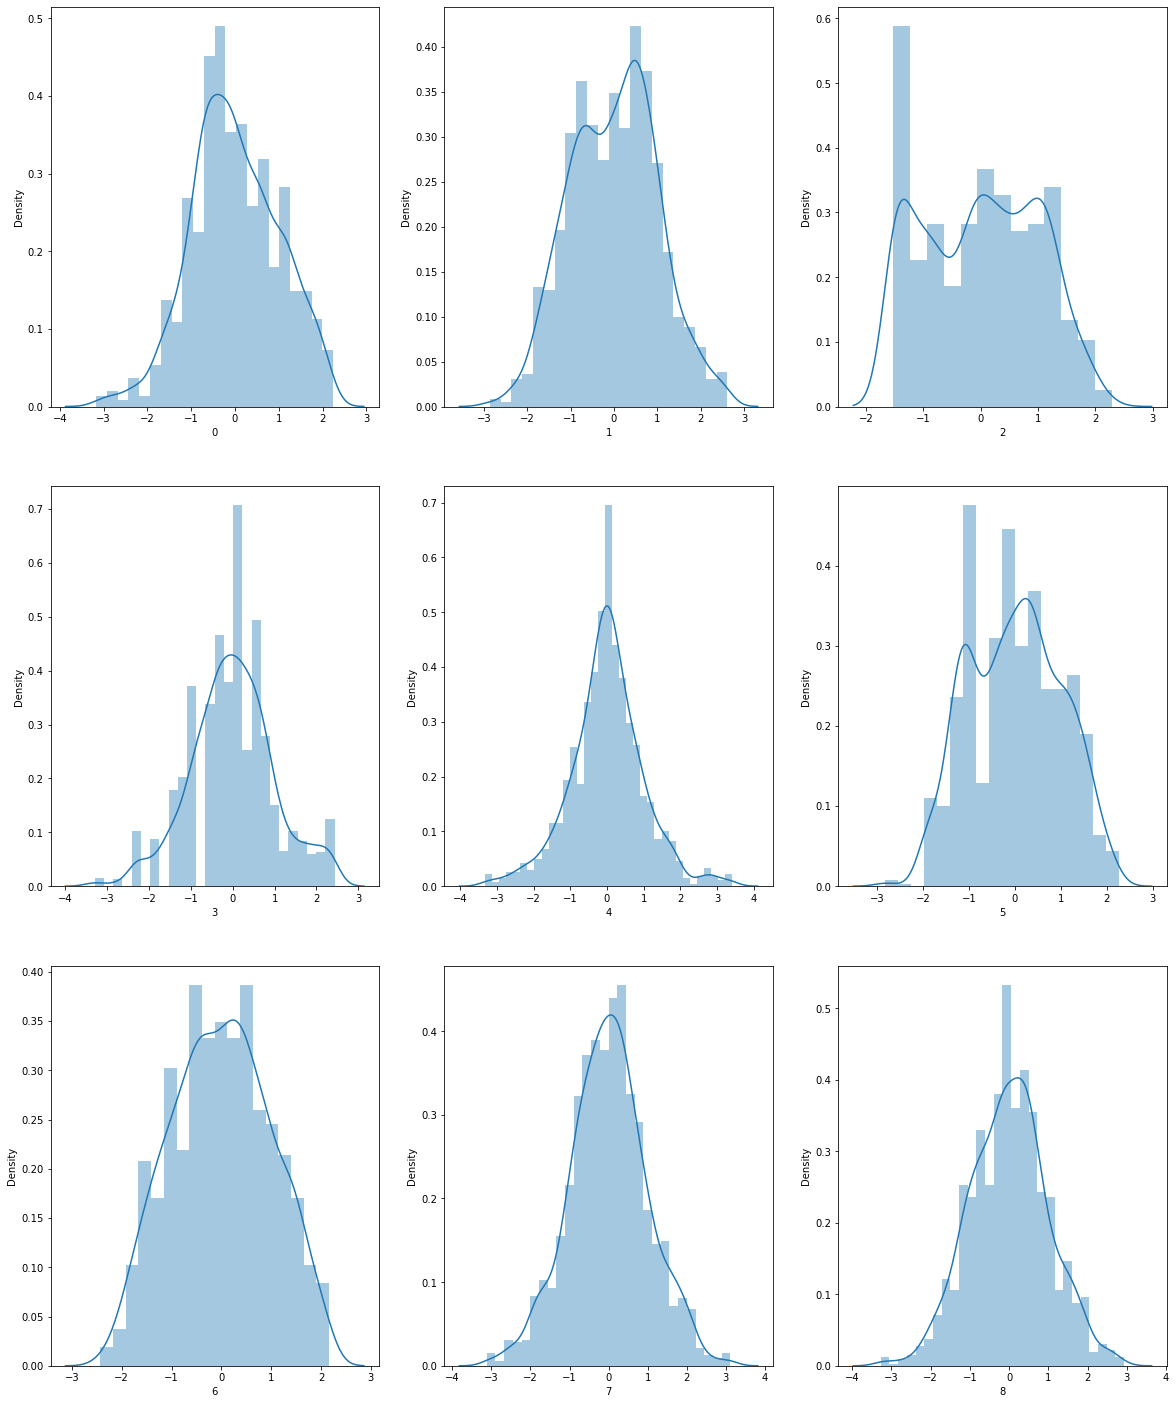

In [81]:
dff = pd.DataFrame(data)
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in dff:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(dff[i])
        plt.xlabel(i)
    plotnumber+=1

- skew has been reduced after dropping outliers

In [84]:
#Splitting into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.25,random_state=100)

In [184]:
#KNN Algorithm --Training
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_train)
print('Accuracy Score:',accuracy_score(y_train,y_pred)*100)

Accuracy Score: 74.81617647058823


In [185]:
pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.500000,0.765385,0.738149,0.741071,0.0,0.748162,0.548921,0.733250
recall,0.150000,0.855914,0.746575,0.624060,0.0,0.748162,0.475310,0.748162
f1-score,0.230769,0.808122,0.742338,0.677551,0.0,0.748162,0.491756,0.735538
support,40.000000,465.000000,438.000000,133.000000,12.0,0.748162,1088.000000,1088.000000


In [186]:
pd.DataFrame(confusion_matrix(y_train,y_pred))

,0,1,2,3,4
0,6,25,8,1,0
1,2,398,63,2,0
2,2,85,327,24,0
3,2,11,36,83,1
4,0,1,9,2,0


In [224]:
#KNN Algorithm --Testing
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
knn_te_acc = accuracy_score(y_test,y_pred)*100
print(f'Accuracy Score:',knn_te_acc)

Accuracy Score: 55.371900826446286


In [225]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.0,0.643312,0.515723,0.450000,0.0,0.553719,0.321807,0.544106
recall,0.0,0.664474,0.554054,0.346154,0.0,0.553719,0.312936,0.553719
f1-score,0.0,0.653722,0.534202,0.391304,0.0,0.553719,0.315846,0.547591
support,7.0,152.000000,148.000000,52.000000,4.0,0.553719,363.000000,363.000000


In [226]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2,3,4
0,0,3,4,0,0
1,4,101,42,5,0
2,1,48,82,17,0
3,2,5,27,18,0
4,0,0,4,0,0


In [190]:
# Decision Tree --Training
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_train)
print('Accuracy Score:',accuracy_score(y_train,y_pred)*100)

Accuracy Score: 100.0


In [191]:
pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,40.0,465.0,438.0,133.0,12.0,1.0,1088.0,1088.0


In [192]:
pd.DataFrame(confusion_matrix(y_train,y_pred))

,0,1,2,3,4
0,40,0,0,0,0
1,0,465,0,0,0
2,0,0,438,0,0
3,0,0,0,133,0
4,0,0,0,0,12


In [227]:
# Decision Tree --Testing
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
DT_te_acc = accuracy_score(y_test,y_pred)*100
print(f'Accuracy Score:',DT_te_acc)

Accuracy Score: 56.74931129476584


In [228]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.062500,0.643836,0.561290,0.534884,0.333333,0.567493,0.427169,0.579942
recall,0.142857,0.618421,0.587838,0.442308,0.250000,0.567493,0.408285,0.567493
f1-score,0.086957,0.630872,0.574257,0.484211,0.285714,0.567493,0.412402,0.572488
support,7.000000,152.000000,148.000000,52.000000,4.000000,0.567493,363.000000,363.000000


In [229]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2,3,4
0,1,3,3,0,0
1,7,94,48,3,0
2,7,38,87,16,0
3,1,11,15,23,2
4,0,0,2,1,1


In [259]:
#Random Forest Algorithm --Training
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=knn.predict(x_train)
print('Accuracy Score:',accuracy_score(y_train,y_pred)*100)

Accuracy Score: 74.81617647058823


In [260]:
pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.500000,0.765385,0.738149,0.741071,0.0,0.748162,0.548921,0.733250
recall,0.150000,0.855914,0.746575,0.624060,0.0,0.748162,0.475310,0.748162
f1-score,0.230769,0.808122,0.742338,0.677551,0.0,0.748162,0.491756,0.735538
support,40.000000,465.000000,438.000000,133.000000,12.0,0.748162,1088.000000,1088.000000


In [261]:
pd.DataFrame(confusion_matrix(y_train,y_pred))

,0,1,2,3,4
0,6,25,8,1,0
1,2,398,63,2,0
2,2,85,327,24,0
3,2,11,36,83,1
4,0,1,9,2,0


In [230]:
# Random Forest Algorithm --Testing
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
rfc_te_acc = accuracy_score(y_test,y_pred)*100
print(f'Accuracy Score:',rfc_te_acc)

Accuracy Score: 58.40220385674931


In [231]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.062500,0.673611,0.576923,0.547619,0.200000,0.584022,0.412131,0.599138
recall,0.142857,0.638158,0.608108,0.442308,0.250000,0.584022,0.416286,0.584022
f1-score,0.086957,0.655405,0.592105,0.489362,0.222222,0.584022,0.409210,0.590076
support,7.000000,152.000000,148.000000,52.000000,4.000000,0.584022,363.000000,363.000000


In [232]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2,3,4
0,1,3,3,0,0
1,5,97,45,5,0
2,8,35,90,13,2
3,2,9,16,23,2
4,0,0,2,1,1


In [235]:
#Support Vector Machine(SVM) Algorithm --Training
svm=SVC()
svm.fit(x_train,y_train)
y_pred=knn.predict(x_train)
print('Accuracy Score:',accuracy_score(y_train,y_pred)*100)

Accuracy Score: 74.81617647058823


In [236]:
pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.500000,0.765385,0.738149,0.741071,0.0,0.748162,0.548921,0.733250
recall,0.150000,0.855914,0.746575,0.624060,0.0,0.748162,0.475310,0.748162
f1-score,0.230769,0.808122,0.742338,0.677551,0.0,0.748162,0.491756,0.735538
support,40.000000,465.000000,438.000000,133.000000,12.0,0.748162,1088.000000,1088.000000


In [237]:
pd.DataFrame(confusion_matrix(y_train,y_pred))

,0,1,2,3,4
0,6,25,8,1,0
1,2,398,63,2,0
2,2,85,327,24,0
3,2,11,36,83,1
4,0,1,9,2,0


In [238]:
# Support Vector Machine(SVM) --Testing
svm=SVC()
svm.fit(x_train,y_train)
y_pred=DT.predict(x_test)
svm_te_acc = accuracy_score(y_test,y_pred)*100
print(f'Accuracy Score:',svm_te_acc)

Accuracy Score: 58.40220385674931


In [239]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.062500,0.673611,0.576923,0.547619,0.200000,0.584022,0.412131,0.599138
recall,0.142857,0.638158,0.608108,0.442308,0.250000,0.584022,0.416286,0.584022
f1-score,0.086957,0.655405,0.592105,0.489362,0.222222,0.584022,0.409210,0.590076
support,7.000000,152.000000,148.000000,52.000000,4.000000,0.584022,363.000000,363.000000


In [240]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2,3,4
0,1,3,3,0,0
1,5,97,45,5,0
2,8,35,90,13,2
3,2,9,16,23,2
4,0,0,2,1,1


In [243]:
scr=cross_val_score(knn,data,labels,cv=5)
print('Cross validation score of KNN: ',scr.mean()*100)
print('Difference between CV_score and acc of KNN: ',(knn_te_acc -scr.mean()*100))
scr=cross_val_score(DT,data,labels,cv=5)
print('Cross validation score of DTC: ',scr.mean()*100)
print('Difference between CV_score and acc of DTC: ',(DT_te_acc -scr.mean()*100))
scr=cross_val_score(rfc,data,labels,cv=5)
print('Cross validation score of RFC: ',scr.mean()*100)
print('Difference between CV_score and acc of rfc: ',(rfc_te_acc -scr.mean()*100))
scr=cross_val_score(svm,data,labels,cv=5)
print('Cross validation score of SVM: ',scr.mean()*100)
print('Difference between CV_score and acc of svm: ',(svm_te_acc -scr.mean()*100))

Cross validation score of KNN:  52.99940751273847
Difference between CV_score and acc of KNN:  2.372493313707814
Cross validation score of DTC:  47.2084370186041
Difference between CV_score and acc of DTC:  9.540874276161738
Cross validation score of RFC:  58.10072283445906
Difference between CV_score and acc of rfc:  0.30148102229024687
Cross validation score of SVM:  56.99869652802464
Difference between CV_score and acc of svm:  1.4035073287246718


<b>The cross val score difference is less for Random Forest Classifier(RFC) so the best fit model is Random Forest Classifier(RFC).

In [250]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

### HPT

In [251]:
gridsearch=GridSearchCV(rfc,param_grid)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [253]:
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [254]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   29.2s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [256]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [262]:
#Random Forest Algorithm --Training after HPT using best params
rfc=RandomForestClassifier(bootstrap=True,max_depth=100,max_features=2,min_samples_leaf=3,min_samples_split=8,n_estimators = 1000)
rfc.fit(x_train,y_train)
y_pred=knn.predict(x_train)
print('Accuracy Score:',accuracy_score(y_train,y_pred)*100)

Accuracy Score: 74.81617647058823


In [265]:
pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

,4,5,6,7,8,accuracy,macro avg,weighted avg
precision,0.500000,0.765385,0.738149,0.741071,0.0,0.748162,0.548921,0.733250
recall,0.150000,0.855914,0.746575,0.624060,0.0,0.748162,0.475310,0.748162
f1-score,0.230769,0.808122,0.742338,0.677551,0.0,0.748162,0.491756,0.735538
support,40.000000,465.000000,438.000000,133.000000,12.0,0.748162,1088.000000,1088.000000


In [266]:
pd.DataFrame(confusion_matrix(y_train,y_pred))

,0,1,2,3,4
0,6,25,8,1,0
1,2,398,63,2,0
2,2,85,327,24,0
3,2,11,36,83,1
4,0,1,9,2,0


In [268]:
#Model Saved
filename='Wine quality.pkl'
pickle.dump(svm,open(filename,'wb'))